# Машинное обучение, РЭШ

# Практическое задание 7. Бустинговое

## Общая информация

Дата выдачи: 10.12.2022

Дедлайн: 25.12.2022 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему mynes. Посылка должна содержать:
* Ноутбук homework-practice-07-Username.ipynb
* Файл [boosting.py](https://github.com/esokolov/ml-course-hse/tree/master/2021-fall/homeworks-practice/homework-practice-07-boosting)

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [1]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

[Ссылка на данные](https://github.com/esokolov/ml-course-hse/tree/master/2021-fall/homeworks-practice/homework-practice-07-boosting)

In [2]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [4]:
%load_ext autoreload

In [5]:
x = 52.75

In [6]:
(1 - x)**2 + (50 - x)**2 + (60 - x)**2 + (100 - x)**2

4970.75

In [7]:
y = 50.5
z = 55

In [8]:
(1 - y)**2 + (100 - y)**2

4900.5

In [9]:
(50 - z)**2 + (60 - z)**2

50

In [22]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

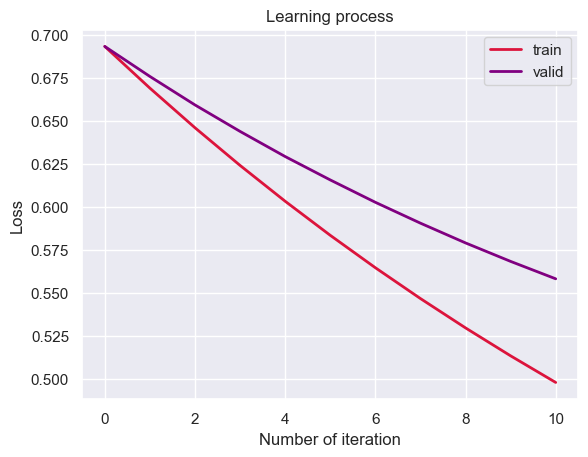

In [23]:
boosting = Boosting(plot=True)

boosting.fit(x_train, y_train, x_valid, y_valid)

## Задание 2. Обучение градиентного бустинга (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [25]:
results = {}
results['train'] = []
results['valid'] = []
results['test'] = []



depths = range(1, 30, 2)

for max_depth in depths:
    # param_dict = {'max_depth':max_depth}
    boosting = Boosting(max_depth=max_depth)
    boosting.fit(x_train, y_train, x_valid, y_valid)
    results['train'].append(boosting.score(x_train, y_train))
    results['valid'].append(boosting.score(x_valid, y_valid))
    results['test'].append(boosting.score(x_test, y_test))

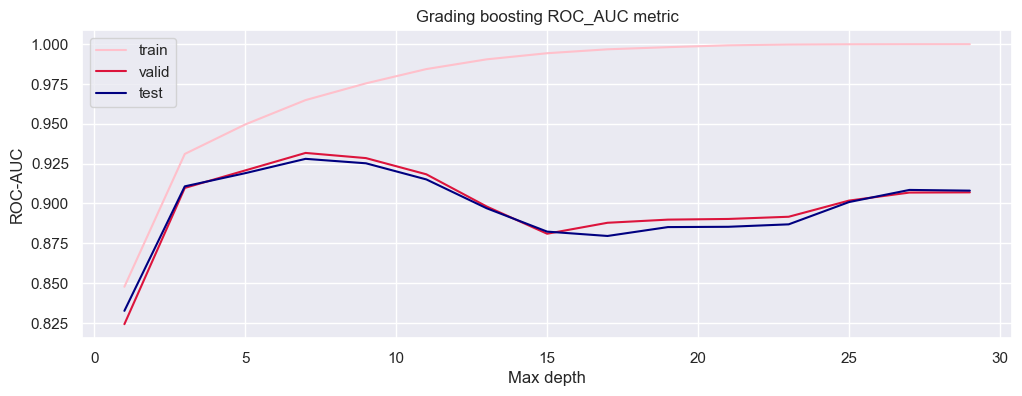

In [26]:
plt.figure(figsize=(12,4))

plt.plot(list(range(1,30,2)), results['train'], 'pink', label='train')
plt.plot(list(range(1,30,2)), results['valid'], 'crimson', label='valid')
plt.plot(list(range(1,30,2)), results['test'], 'navy', label='test')

plt.title('Grading boosting ROC_AUC metric')
plt.xlabel('Max depth')
plt.ylabel('ROC-AUC')
plt.legend()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Наилучшее качество достигается где-то на глубине 7-8. Это может объясняться тем, что при меньшей глубине базовые модели слишком простые, в то время как при большей глубине они переобучаются под train выборку, о чем свищетельствует дальнейший рост ROC-AUC score на train множестве.

## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (2 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей.

In [36]:
%%time

n_estimators_list = list([1,5,10,20,50,100])
learning_rate_list = list([0.01,0.1,1])
early_stopping_rounds_list = list([None,5,10,20])
max_depth_list = list([5,7,10,30,50,None])
min_samples_split_list = list([2,5,10,20,50])
min_samples_leaf_list = list([1,5,10,20,50])

best_params = {}
best_score = 0


counter = 0
# Запустим grid search по всем параметрам
for n_estimators in n_estimators_list:
    for learning_rate in learning_rate_list:
        for early_stopping_rounds in early_stopping_rounds_list:
            for max_depth in max_depth_list:
                for min_samples_split in min_samples_split_list:
                    for min_samples_leaf in min_samples_leaf_list:
                        boosting = Boosting(n_estimators=n_estimators,
                                            learning_rate=learning_rate,
                                            early_stopping_rounds = early_stopping_rounds,
                                            max_depth = max_depth,
                                            min_samples_split = min_samples_split,
                                            min_samples_leaf = min_samples_leaf)
                        score = boosting.score(x_valid, y_valid)
                        if score > best_score:
                            best_score = score
                            best_params['n_estimators'] = n_estimators
                            best_params['learning_rate'] = learning_rate
                            best_params['early_stopping_rounds'] = early_stopping_rounds
                            best_params['max_depth'] = max_depth
                            best_params['min_samples_split'] = min_samples_split
                            best_params['min_samples_leaf'] = min_samples_leaf

CPU times: user 9.68 s, sys: 39.3 ms, total: 9.72 s
Wall time: 9.73 s


In [37]:
best_params

{'n_estimators': 1,
 'learning_rate': 0.01,
 'early_stopping_rounds': None,
 'max_depth': 5,
 'min_samples_split': 2,
 'min_samples_leaf': 1}

In [39]:
boosting = Boosting(n_estimators=1, 
                    learning_rate=0.01,
                    early_stopping_rounds=None,
                    max_depth=5,
                    min_samples_split=2,
                    min_samples_leaf=1)

%time boosting.fit(x_train, y_train, x_valid, y_valid)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 89.9 ms, sys: 2.39 ms, total: 92.3 ms
Wall time: 92.2 ms
Train ROC-AUC 0.9426
Valid ROC-AUC 0.9142
Test ROC-AUC 0.9131


## Задание 4. Пробуем разные библиотеки (2 балла)

Выберите себе библиотеку с реализацией градиентного бустинга по вкусу из следующих трёх - [XGBoost](https://xgboost.readthedocs.io/en/stable/python/python_intro.html), [LightGBM](https://lightgbm.readthedocs.io/en/latest/Python-Intro.html), [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart). Подберите основные гиперпараметры, постарайтесь добиться наилучшего качества на тестовых данных. Сравните результаты своей реализации с результатами библиотечного бустинга.

In [41]:
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [42]:
baseline_boosting_model = CatBoostClassifier()

baseline_boosting_model.fit(x_train, y_train, 
                            eval_set=[(x_train, y_train), 
                                      (x_valid, y_valid)], 
                            verbose=True)

y_train_pred = baseline_boosting_model.predict_proba(x_train)[:,1]
y_valid_pred = baseline_boosting_model.predict_proba(x_valid)[:,1]
y_test_pred = baseline_boosting_model.predict_proba(x_test)[:,1]

print(f'Train ROC-AUC = {roc_auc_score(y_train, y_train_pred)}')
print(f'Valid ROC-AUC = {roc_auc_score(y_valid, y_valid_pred)}')
print(f'Test ROC-AUC = {roc_auc_score(y_test, y_test_pred)}')

Learning rate set to 0.065429
0:	learn: 0.6161726	test: 0.6162149	test1: 0.6198377	best: 0.6198377 (0)	total: 64.4ms	remaining: 1m 4s
1:	learn: 0.5567818	test: 0.5568011	test1: 0.5635965	best: 0.5635965 (1)	total: 69.5ms	remaining: 34.7s
2:	learn: 0.5044196	test: 0.5044475	test1: 0.5145067	best: 0.5145067 (2)	total: 74.4ms	remaining: 24.7s
3:	learn: 0.4670264	test: 0.4670454	test1: 0.4791981	best: 0.4791981 (3)	total: 79.9ms	remaining: 19.9s
4:	learn: 0.4334752	test: 0.4334929	test1: 0.4485189	best: 0.4485189 (4)	total: 85.3ms	remaining: 17s
5:	learn: 0.4072790	test: 0.4072941	test1: 0.4239548	best: 0.4239548 (5)	total: 91.1ms	remaining: 15.1s
6:	learn: 0.3871989	test: 0.3872179	test1: 0.4065015	best: 0.4065015 (6)	total: 96.1ms	remaining: 13.6s
7:	learn: 0.3701946	test: 0.3702093	test1: 0.3919367	best: 0.3919367 (7)	total: 101ms	remaining: 12.5s
8:	learn: 0.3585813	test: 0.3585906	test1: 0.3818148	best: 0.3818148 (8)	total: 106ms	remaining: 11.7s
9:	learn: 0.3469985	test: 0.3470126	te

In [52]:
np.logspace(0, 3, 10).astype('int')

array([   1,    2,    4,   10,   21,   46,  100,  215,  464, 1000])

In [60]:
# Попробуем перебрать параметры по сетке
clf = CatBoostClassifier()
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators': [10,50,100],
    'learning_rate': [0.01,0.1,1],
    'early_stopping_rounds': [None,5,10],
    'max_depth': [5,7,10, None],
    'min_data_in_leaf': [1,5,10]
}

scorer = make_scorer(roc_auc_score)
clf_grid = GridSearchCV(estimator=clf, param_grid=params, scoring=scorer, cv=5)

### Don't run the following cell. it runs too long

In [61]:
clf_grid.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), 
                  (x_valid, y_valid)], 
        verbose=True)

0:	learn: 0.6809708	test: 0.6809668	test1: 0.6814167	best: 0.6814167 (0)	total: 5.49ms	remaining: 49.4ms
1:	learn: 0.6714598	test: 0.6714607	test1: 0.6724557	best: 0.6724557 (1)	total: 10.4ms	remaining: 41.5ms
2:	learn: 0.6610249	test: 0.6610432	test1: 0.6624541	best: 0.6624541 (2)	total: 15ms	remaining: 35ms
3:	learn: 0.6503463	test: 0.6503853	test1: 0.6523167	best: 0.6523167 (3)	total: 19.3ms	remaining: 29ms
4:	learn: 0.6400828	test: 0.6401341	test1: 0.6425593	best: 0.6425593 (4)	total: 23.4ms	remaining: 23.4ms
5:	learn: 0.6302978	test: 0.6303325	test1: 0.6332637	best: 0.6332637 (5)	total: 27.9ms	remaining: 18.6ms
6:	learn: 0.6199728	test: 0.6200202	test1: 0.6233665	best: 0.6233665 (6)	total: 31.9ms	remaining: 13.7ms
7:	learn: 0.6109337	test: 0.6109441	test1: 0.6146515	best: 0.6146515 (7)	total: 36.4ms	remaining: 9.09ms
8:	learn: 0.6024284	test: 0.6024339	test1: 0.6066217	best: 0.6066217 (8)	total: 41ms	remaining: 4.56ms
9:	learn: 0.5943146	test: 0.5943017	test1: 0.5990019	best: 0.59

KeyError: 'early_stopping_rounds'

In [62]:
clf_grid.best_params_

{'early_stopping_rounds': None,
 'learning_rate': 0.1,
 'max_depth': None,
 'min_data_in_leaf': 1,
 'n_estimators': 100}

In [63]:
cb_clf = CatBoostClassifier(iterations=100, 
                              learning_rate=0.1,
                              early_stopping_rounds=None,
                              max_depth=None,
                              min_data_in_leaf=1)

cb_clf.fit(x_train, y_train, 
             eval_set=[(x_train, y_train), 
                       (x_valid, y_valid)], 
             verbose=False)

y_train_pred = cb_clf.predict_proba(x_train)[:,1]
y_valid_pred = cb_clf.predict_proba(x_valid)[:,1]
y_test_pred = cb_clf.predict_proba(x_test)[:,1]

print(f'Train ROC-AUC = {roc_auc_score(y_train, y_train_pred)}')
print(f'Valid ROC-AUC = {roc_auc_score(y_valid, y_valid_pred)}')
print(f'Test ROC-AUC = {roc_auc_score(y_test, y_test_pred)}')

Train ROC-AUC = 0.9739307435253497
Valid ROC-AUC = 0.9452848065145155
Test ROC-AUC = 0.9402131555619935


### Задание 5 (бонус). Пробуем ещё немножко библиотек (1 балл)

Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/). Сравните полученное качество с вашим ручным перебором. Используйте эту библиотеку чтобы подобрать параметры и для своей реалзиации и для библиотечной.

Используем hyperopt. Строим по примеру с https://towardsdatascience.com/an-example-of-hyperparameter-optimization-on-xgboost-lightgbm-and-catboost-using-hyperopt-12bc41a271e

In [65]:
from hyperopt import hp
from sklearn.metrics import mean_squared_error
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [67]:
# XGB
xgb_reg_params = {
    'learning_rate': hp.choice('learning_rate', np.arange(0.05, 0.31, 0.05)),
    'max_depth': hp.choice('max_depth', np.arange(5, 16, 1, dtype=int)),
    'min_child_weight': hp.choice('min_child_weight', np.arange(1, 8, 1, dtype=int)),
    'n_estimators': 100}
xgb_fit_params = {
    'early_stopping_rounds': 10,
    'verbose': False}
xgb_para = dict()
xgb_para['reg_params'] = xgb_reg_params
xgb_para['fit_params'] = xgb_fit_params
xgb_para['loss_func'] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))

# CatBoost
ctb_reg_params = {
    'learning_rate': hp.choice('learning_rate', np.arange(0.05, 0.21, 0.05)),
    'max_depth': hp.choice('max_depth', np.arange(7, 12, 1, dtype=int)),
    'min_data_in_leaf': hp.choice('min_data_in_leaf', np.arange(1, 21, 4, dtype=int)),
    'n_estimators': 100}
ctb_fit_params = {
    'early_stopping_rounds': 10,
    'verbose': False}
ctb_para = dict()
ctb_para['reg_params'] = ctb_reg_params
ctb_para['fit_params'] = ctb_fit_params
ctb_para['loss_func'] = lambda y, pred: np.sqrt(mean_squared_error(y, pred))

In [68]:
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials

class HPOpt(object):

    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test  = x_test
        self.y_train = y_train
        self.y_test  = y_test

    def process(self, fn_name, space, trials, algo, max_evals):
        fn = getattr(self, fn_name)
        try:
            result = fmin(fn=fn, space=space, algo=algo, max_evals=max_evals, trials=trials)
        except Exception as e:
            return {'status': STATUS_FAIL,
                    'exception': str(e)}
        return result, trials

    def xgb_reg(self, para):
        reg = XGBClassifier(**para['reg_params'])
        return self.train_reg(reg, para)

    def ctb_reg(self, para):
        reg = CatBoostClassifier(**para['reg_params'])
        return self.train_reg(reg, para)

    def train_reg(self, reg, para):
        reg.fit(self.x_train, self.y_train,
                eval_set=[(self.x_train, self.y_train), (self.x_test, self.y_test)],
                **para['fit_params'])
        pred = reg.predict(self.x_test)
        loss = para['loss_func'](self.y_test, pred)
        return {'loss': loss, 'status': STATUS_OK}

In [69]:
y_train_xgb = y_train.copy()
y_valid_xgb = y_valid.copy()
y_test_xgb = y_test.copy()

y_train_xgb[y_train_xgb==-1] = 0
y_valid_xgb[y_valid_xgb==-1] = 0
y_test_xgb[y_test_xgb==-1] = 0

obj = HPOpt(x_train, x_valid, y_train_xgb, y_valid_xgb)
xgb_opt = obj.process(fn_name='xgb_reg', space=xgb_para, trials=Trials(), algo=tpe.suggest, max_evals=100)

obj = HPOpt(x_train, x_valid, y_train, y_valid)
ctb_opt = obj.process(fn_name='ctb_reg', space=ctb_para, trials=Trials(), algo=tpe.suggest, max_evals=100)

100%|██████████| 100/100 [01:20<00:00,  1.24trial/s, best loss: 0.6922314403686345]


In [70]:
xgb = XGBClassifier(learning_rate=0.3, max_depth=5, min_child_weight=5)
res_xgb = xgb.fit(x_train, y_train_xgb, eval_set=[(x_train, y_train_xgb), (x_valid, y_valid_xgb)], verbose=False)
y_test_pred_xgb = xgb.predict_proba(x_test)[:,1]
print(f'XGBoost Test ROC-AUC = {roc_auc_score(y_test_xgb, y_test_pred_xgb):.4f}')

ctb = CatBoostClassifier(learning_rate=0.1, max_depth=8, min_data_in_leaf=17)
res_ctb = ctb.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valid, y_valid)], verbose=False)
y_test_pred_ctb = ctb.predict_proba(x_test)[:,1]
print(f'CatBoost Test ROC-AUC = {roc_auc_score(y_test, y_test_pred_ctb):.4f}')

XGBoost Test ROC-AUC = 0.9394
CatBoost Test ROC-AUC = 0.9399


In [71]:
xgb.best_iteration

99

## Задание 6. Интерпретация бустинга (1 балл)

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [ ]:
# YOUR CODE:

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
# YOUR CODE:

## Задание 7 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашими лучшими моделями (ваша реализация с лучшими гиперпараметрами + все модели из библиотек с лучшими гиперпараметрами). Улучшилось ли качество?

In [72]:
def get_models():
    models = []
    models.append(('baseline', Boosting(learning_rate=0.1, max_depth=7)))
    models.append(('ctb', CatBoostClassifier(early_stopping_rounds=None, learning_rate=0.1, max_depth=None, min_data_in_leaf=1, n_estimators=100, )))
    models.append(('xgb', XGBClassifier(learning_rate=0.3, max_depth=5, min_child_weight=5)))
    return models

models = get_models()

meta_x = []
for name, model in models:
    if name == 'xgb':
        model.fit(x_train, y_train_xgb, eval_set=[(x_train, y_train_xgb), (x_valid, y_valid_xgb)], verbose=False)
        y_pred = model.predict_proba(x_test)[:,1]
        y_pred = y_pred.reshape(len(y_pred), 1)
        meta_x.append(y_pred)
    elif name == 'handmade':
        model.fit(x_train, y_train, x_valid, y_valid)
        y_pred = model.predict_proba(x_test)[:,1]
        y_pred = y_pred.reshape(len(y_pred), 1)
        meta_x.append(y_pred)
    
meta_x = np.hstack(meta_x)

In [73]:
from sklearn.linear_model import LogisticRegression
blender = LogisticRegression()
blender.fit(meta_x, y_test)
y_pred = blender.predict_proba(meta_x)[:,1]
print(f'Test ROC-AUC {roc_auc_score(y_test, y_pred):.4f}')

Test ROC-AUC 0.9394


Почему-то получилось даже хуже чем просто CatBoost с хорошими параметрами.

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2022 года?